In [1]:
#import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [2]:
#upload files
from google.colab import files
uploaded = files.upload()

Saving adventures of huckleberry finn by mark twain.txt to adventures of huckleberry finn by mark twain.txt


In [4]:
file = open("adventures of huckleberry finn by mark twain.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','').replace("'",'') #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Adventures of Huckleberry Finn, by Mark Twain (Samuel Clemens) This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you '

In [5]:
len(data)

584051

In [6]:
#can easily convert text to sequence and vice versa with tokenizer package
#creating object and passing preprocessed data
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0] #does not include punctuation or white space
sequence_data[:15]


[2, 178, 334, 862, 8, 964, 8, 1093, 481, 39, 863, 1867, 2838, 2839, 60]

In [7]:
len(sequence_data)



115759

In [8]:
#dictionary for mapping
vocab_size = len(tokenizer.word_index) + 1  #index 0 reserved for padding so +1
print(vocab_size)


7737


In [9]:
sequences = []
#train using 1st 3 words as input and 4th word as output
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]


The Length of sequences are:  115756


array([[   2,  178,  334,  862],
       [ 178,  334,  862,    8],
       [ 334,  862,    8,  964],
       [ 862,    8,  964,    8],
       [   8,  964,    8, 1093],
       [ 964,    8, 1093,  481],
       [   8, 1093,  481,   39],
       [1093,  481,   39,  863],
       [ 481,   39,  863, 1867],
       [  39,  863, 1867, 2838]])

In [13]:
#input in X and output in Y
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)


In [14]:
print("Data: ", X[:10])
print("Output: ", y[:10])


Data:  [[   2  178  334]
 [ 178  334  862]
 [ 334  862    8]
 [ 862    8  964]
 [   8  964    8]
 [ 964    8 1093]
 [   8 1093  481]
 [1093  481   39]
 [ 481   39  863]
 [  39  863 1867]]
Output:  [ 862    8  964    8 1093  481   39  863 1867 2838]


In [15]:
#to_categorical function is used to convert integer labels into a one-hot encoded representation.
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
#allows you to build a neural network model layer by layer.
model = Sequential()
#embedding layer for representing words or tokens as dense vectors of fixed size.vocab_size(no of unique words in your vocabulary),10 (dimensionality of the embedding space),and input_length=3(length of input).
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))#return_sequences=True means one more LSTM layer
model.add(LSTM(1000))#return final output
model.add(Dense(1000, activation="relu"))# Dense layers for learning non-linear relationships in the data.
model.add(Dense(vocab_size, activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             77370     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 7737)              7744737   
                                                                 
Total params: 20,871,107
Trainable params: 20,871,107
Non-trainable params: 0
_________________________________________________________________


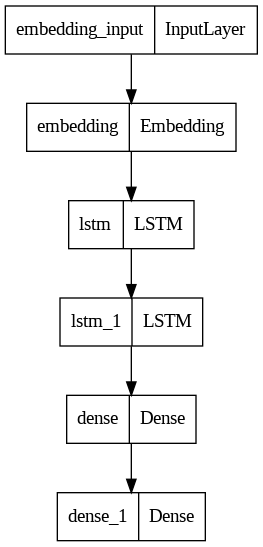

In [18]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)


In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
1809/1809 [==============================] - ETA: 0s - loss: 6.1804
Epoch 1: loss improved from inf to 6.18044, saving model to next_words.h5
1809/1809 [==============================] - 44s 19ms/step - loss: 6.1804
Epoch 2/70
1809/1809 [==============================] - ETA: 0s - loss: 5.6693
Epoch 2: loss improved from 6.18044 to 5.66926, saving model to next_words.h5
1809/1809 [==============================] - 28s 15ms/step - loss: 5.6693
Epoch 3/70
1809/1809 [==============================] - ETA: 0s - loss: 5.3679
Epoch 3: loss improved from 5.66926 to 5.36790, saving model to next_words.h5
1809/1809 [==============================] - 28s 15ms/step - loss: 5.3679
Epoch 4/70
1806/1809 [============================>.] - ETA: 0s - loss: 5.1169
Epoch 4: loss improved from 5.36790 to 5.11700, saving model to next_words.h5
1809/1809 [==============================] - 27s 15ms/step - loss: 5.1170
Epoch 5/70
1809/1809 [==============================] - ETA: 0s - loss: 4.8855
E

In [34]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):
    sequence = tokenizer.texts_to_sequences([text])
    sequence = np.array(sequence)
    preds = model.predict(sequence)[0]
    top_indices = np.argsort(preds)[-5:][::-1]  # Get the indices of the top 5 words
    top_words = [tokenizer.index_word[index] for index in top_indices]

    for word in top_words:
        predicted_text = text + [word]  # Concatenate the word with the existing list
        print(" ".join(predicted_text))  # Convert the list to a string and print

    return top_words

In [35]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: can you come
['can', 'you', 'come']
1/1 [==============================] - 1s 602ms/step
can you come any
can you come you
can you come right
can you come it
can you come to
Enter your line: where are you
['where', 'are', 'you']
1/1 [==============================] - 0s 19ms/step
where are you to
where are you as
where are you heaving
where are you that
where are you about
Enter your line: what is your
['what', 'is', 'your']
1/1 [==============================] - 0s 20ms/step
what is your idea
what is your bad
what is your matter
what is your country
what is your best
Enter your line: what is your best
['is', 'your', 'best']
1/1 [==============================] - 0s 18ms/step
is your best what
is your best way
is your best boy
is your best holt—for
is your best work
Enter your line: what is your best way 
['best', 'way', '']
1/1 [==============================] - 1s 636ms/step
best way  but
best way  i
best way  to
best way  and
best way  that
Enter your line: 0
Execut